# Load Tweets

In [16]:
import pandas as pd
df = pd.read_csv("label_tweets_v2.csv")
df=df.rename(columns={"Unnamed: 0":"index"})

In [17]:
# locad the data 
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
1,1,0.0000,NaN,it s am so i should probably change from my pj...,4/29/2020 23:59,DrHelen_Mac,#IsolationLife #WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH


# We will process the five parts

### 1.Text Analytics and NLP

### 2.Compare Text Analytics, NLP and Text Mining
 - Text Analysis Operations using NLTK
 - Tokenization
 - Stopwords
 - Lexicon Normalization such as Stemming and Lemmatization
 - POS Tagging

### 3.Sentiment Analysis

### 4.Text Classification

### 5.Performing Sentiment Analysis using Text Classification


In [30]:
#Loading NLTK
import nltk
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')

sentence tokenization

In [36]:
text="Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.The sky is pinkish-blue. You shouldn't eat cardboard"


In [54]:
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.The sky is pinkish-blue.', "You shouldn't eat cardboard"]


work tokenization

In [59]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


Frequency Distribution

In [39]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 28 outcomes>


In [40]:
fdist.most_common(2)

[('is', 3), (',', 2)]

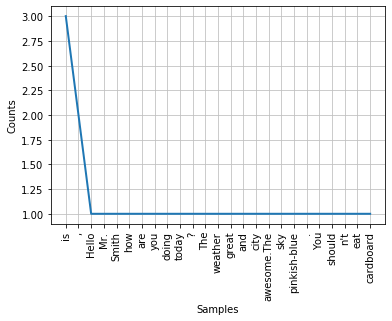

In [42]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
%matplotlib inline
fdist.plot(30,cumulative=False)
plt.show()

Stopwords

In [49]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'those', 'will', 'wasn', 'm', 'isn', 'has', 'yourselves', "won't", 'were', 'which', 'yours', "wouldn't", 'doesn', 'these', 'had', 'me', 'down', 'didn', 'why', 'aren', 'wouldn', 'there', "shan't", 'both', 'being', 'having', "it's", "that'll", 'did', 'than', 'mightn', "shouldn't", 'no', "haven't", 'here', 't', 'can', 'ours', 'you', "didn't", 'and', 'your', 'because', 'the', "couldn't", "isn't", 'above', "doesn't", "you're", 'am', 'up', 'theirs', 'by', "needn't", 'be', 'most', 'in', 'during', 'hasn', 'again', 'an', 'mustn', 'with', "hadn't", 'before', 'further', 'if', 'our', 'or', 'as', 'ma', 'under', 'them', "hasn't", 'ain', 'that', 'was', 'very', 'more', 'what', 'against', 's', 'have', 'such', "aren't", 'on', 'through', 'are', 'when', 'out', 'once', 'needn', 'y', 'it', 'himself', 'shouldn', 'after', 'who', 'off', 'only', 'i', 'haven', 'do', 'her', 'its', 'itself', "you'd", 'whom', 'does', 'to', "mustn't", 'own', 'we', 'they', 'been', 'just', 'herself', "should've", 'same', 'couldn', 'm

In [63]:
#removing stopwords
tokenized_sent = tokenized_word

filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)


print("Tokenized Sentence:",tokenized_sent)
print("----")
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome.The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
----
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


Stemming

In [65]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Sentence:",filtered_sent)

print("----")

print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome.The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
----
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesome.th', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


Lemmatization

In [68]:
#Lexicon Normalization
#performing stemming and Lemmatization
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### Text Classification

![](https://tva1.sinaimg.cn/large/007S8ZIlgy1gff1cvpokrj30uw0gc0wb.jpg)

In [71]:
# Import pandas
import pandas as pd
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115000 entries, 0 to 114999
Data columns (total 7 columns):
index       115000 non-null int64
score       115000 non-null float64
label       79355 non-null float64
text        115000 non-null object
date        115000 non-null object
username    115000 non-null object
hashtags    115000 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


In [72]:
df.head()

,index,score,label,text,date,username,hashtags
0,0,-0.0258,0.0,yes you can get burnout stress migraines even ...,4/29/2020 23:59,maria_emlano,#WFH
1,1,0.0000,NaN,it s am so i should probably change from my pj...,4/29/2020 23:59,DrHelen_Mac,#IsolationLife #WFH
2,2,0.1779,1.0,icymi an rsa customer and discuss how the incr...,4/29/2020 23:59,RSAsecurity,#ICYMI #WFH #security #DynamicWorkforceRisk
3,3,0.5719,1.0,my shift has ended hurray for the long weekend...,4/29/2020 23:59,iam_aikenlei,#wfh #longweekend #ecqpic
4,4,0.9349,1.0,who can share the best hr policy for wfh in my...,4/29/2020 23:59,subh10,#WFH


In [100]:
#remove null value

df=df.dropna()
df.isnull().sum()

index       0
score       0
label       0
text        0
date        0
username    0
hashtags    0
dtype: int64

In [101]:
df.label.value_counts()

1.0    64838
0.0    14517
Name: label, dtype: int64

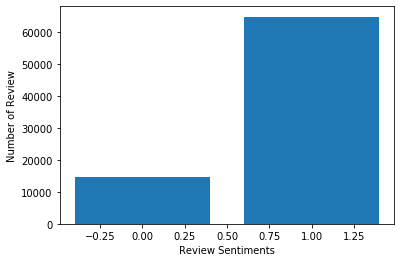

In [102]:
Sentiment_count=df.groupby('label').count()



plt.bar(Sentiment_count.index.values, Sentiment_count["text"])


plt.xlabel('Review Sentiments')

plt.ylabel('Number of Review')


plt.show()

### Feature Generation using Bag of Words

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['text'])

### Split train and test set

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['label'], test_size=0.3, random_state=1)

### Model Building and Evaluation

In [117]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8401730583441844


In [118]:
y_pred = clf.predict(X_test)
print((y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.29      0.40      4435
         1.0       0.86      0.97      0.91     19372

    accuracy                           0.84     23807
   macro avg       0.76      0.63      0.66     23807
weighted avg       0.82      0.84      0.81     23807



In [119]:
acc = metrics.accuracy_score(y_test, predicted)
pre = metrics.precision_score(y_test, predicted)
rec = metrics.recall_score(y_test, predicted)
f1 =metrics.f1_score(y_test, predicted)

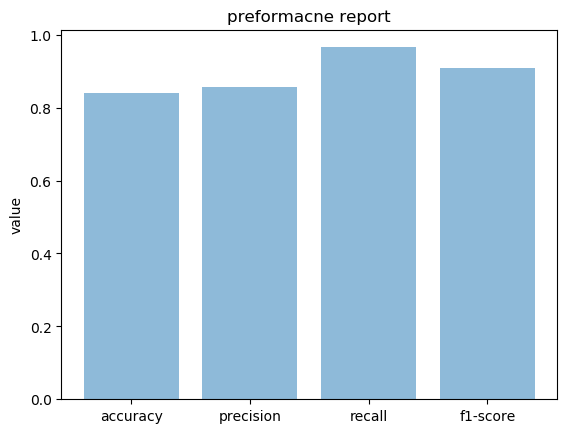

In [124]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance = [acc,pre,rec,f1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

### Feature Generation using TF-IDF

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['text'])

##### Split train and test set (TF-IDF)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['label'], test_size=0.3, random_state=123)

##### Model Building and Evaluation (TF-IDF)

In [109]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8189608098458436


In [111]:
from sklearn.metrics import classification_report, accuracy_score

print("Train accuracy:", clf.score(X_train, y_train), ", Test accuracy:", clf.score(X_test, y_test))


Train accuracy: 0.8252142291351624 , Test accuracy: 0.8189608098458436


In [113]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.02      0.04      4382
         1.0       0.82      1.00      0.90     19425

    accuracy                           0.82     23807
   macro avg       0.80      0.51      0.47     23807
weighted avg       0.81      0.82      0.74     23807



In [ ]:
acc = metrics.accuracy_score(y_test, predicted)
pre = metrics.precision_score(y_test, predicted)
rec = metrics.recall_score(y_test, predicted)
f1 =metrics.f1_score(y_test, predicted)

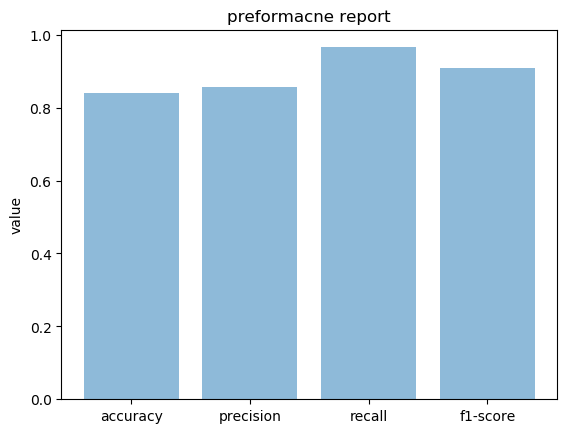

In [125]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance = [acc,pre,rec,f1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Conclusion

In this procedure, we conduct sentiment analysis and text classification using scikit-learn